In [42]:
import cfbd
import pandas as pd
from cfbd.models.play import Play
from sklearn import linear_model
from sklearn.cluster import HDBSCAN, KMeans
from sklearn import svm

configuration = cfbd.Configuration(
    access_token = 'FdwvuNwhZCikhkr0kboz6oWmIZSf4St1XKC6jMAVgkAGMnFQYsGxDSFBev85ReW4'
)

with cfbd.ApiClient(configuration) as api_client:
    api_instance = cfbd.PlaysApi(api_client)
    plays = api_instance.get_plays(year=2024, season_type ='postseason', team = 'Texas', offense = 'Texas', week = 1)

In [36]:
for i in plays:
    x = 1


In [16]:
index = 0
index_list = []
offense_score = []
defense_score = []
period = []
yardline = []
yards_to_goal = []
down = []
distance = []
yards_gained = []
play_type = []
for i in plays:
    index += 1
    index_list.append(index)
    offense_score.append(i.offense_score)
    defense_score.append(i.defense_score)
    period.append(i.period)
    yardline.append(i.yardline)
    yards_to_goal.append(i.yards_to_goal)
    down.append(i.down)
    distance.append(i.distance)
    yards_gained.append(i.yards_gained)
    play_type.append(i.play_type)

In [17]:
plays_df = pd.DataFrame(index_list)

In [18]:
plays_df['offense_score'] = offense_score
plays_df['defense_score'] = defense_score
plays_df['period'] = period
plays_df['yardline'] = yardline
plays_df['yards_to_goal'] = yards_to_goal
plays_df['down'] = down
plays_df['distance'] = distance
plays_df['yards_gained'] = yards_gained
plays_df['play_type'] = play_type

In [19]:
play_type_mask = (plays_df['play_type'] == 'Pass Incompletion') | (plays_df['play_type'] == 'Pass Reception') | (plays_df['play_type'] == 'Rush') | (plays_df['play_type'] == 'Punt') | (plays_df['play_type'] == 'Passing Touchdown') | (plays_df['play_type'] == 'Field Goal Missed') | (plays_df['play_type'] == 'Rushing Touchdown') | (plays_df['play_type'] == 'Field Goal Good')
play_type_df = plays_df.loc[play_type_mask]

(Basic Regression) How many yards will Sark get any given down

In [28]:
X = play_type_df[['down','yardline']]

In [29]:
y = play_type_df['yards_gained']


In [30]:
import numpy as np

In [31]:
X = np.array(X)
y = np.array(y)


In [32]:

reg = linear_model.LinearRegression()
reg.fit(X,y)
#y_pred = reg.predict(3)

LinearRegression()

In [33]:
y_pred = reg.predict([[3,65]])

In [34]:
y_pred

array([7.34676872])

In [48]:
def play_type_converter(x):
    y=0
    if x == 'Pass Incompletion':
        y = 'Pass'
    elif x == 'Pass Reception':
        y = 'Pass'
    elif x == 'Rush':
        y = 'Rush'
    elif x == 'Punt':
        y = 'Punt'
    elif x == 'Pass Touchdown':
        y = 'Pass'
    elif x == 'Field Goal Missed':
        y = 'Kick'
    elif x == 'Rushing Touchdown':
        y = 'Rush'
    elif x == 'Field Goal Good':
        y = 'Kick'
    return y
play_type_df['type_conv'] = play_type_df['play_type'].apply(play_type_converter)

C:\Users\Drews\AppData\Local\Temp\ipykernel_7120\2676242781.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  play_type_df['type_conv'] = play_type_df['play_type'].apply(play_type_converter)


In [106]:
X = play_type_df[['offense_score','defense_score','period','yardline','yards_to_goal', 'down', 'distance']]
y = play_type_df['type_conv']

In [107]:
X['target'] = y
X= X[X['target'] !=0]
y = X['target']
X = X[['offense_score','defense_score','period','yardline','yards_to_goal', 'down', 'distance']]


C:\Users\Drews\AppData\Local\Temp\ipykernel_7120\2846770121.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['target'] = y


In [110]:
from sklearn.model_selection import train_test_split

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [114]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [115]:
knn.score(X_test, y_test)

0.5384615384615384

In [116]:
knn.predict([[14, 14,4, 70, 30, 4, 20]])

C:\Users\Drews\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Pass'], dtype=object)

(Basic Clustering) Grouping Run and Pass Plays

In [118]:
X['target'] = y

In [125]:
X_mask = (X['target'] == 'Rush') | (X['target'] == 'Pass')
X = X.loc[play_type_mask]

In [147]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [148]:
X = X[['down', 'distance']]

In [151]:
def optimize(data, max_k):
    means = []
    inertias = []
    for k in range(1, max_k):
        kmeans= KMeans(n_clusters=k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)
    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertias)
    plt.xlabel('k')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()


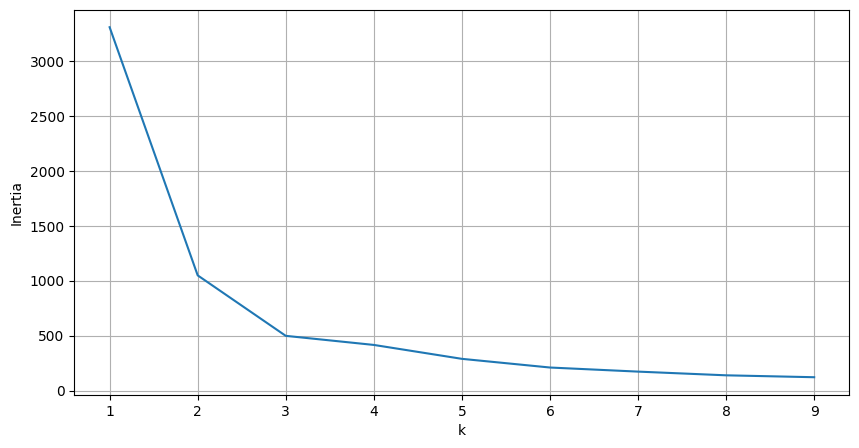

In [152]:
optimize(X,10)

In [154]:
kmeans= KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [155]:
X['labels'] = kmeans.labels_

<function matplotlib.pyplot.show(close=None, block=None)>

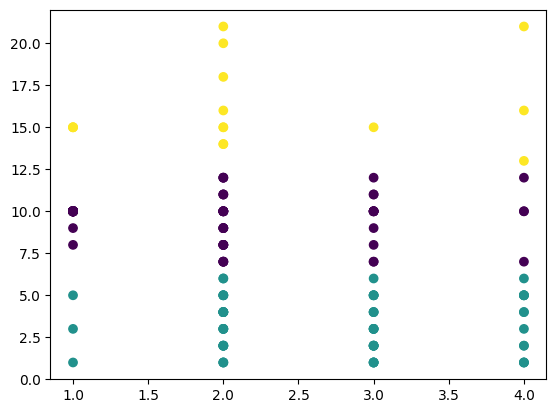

In [161]:
plt.scatter(x = X['down'], y=X['distance'], c = X['labels'])
plt.show